# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [38]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [39]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data['Gender'] == 'Male']
female_df = data.loc[data['Gender'] == 'Female']

male_height_mean = male_df['Height'].mean()
male_height_std = male_df['Height'].std()
male_weight_mean = male_df['Weight'].mean()
male_weight_std = male_df['Weight'].std()

female_height_mean = female_df['Height'].mean()
female_height_std = female_df['Height'].std()
female_weight_mean = female_df['Weight'].mean()
female_weight_std = female_df['Weight'].std()

print(male_height_mean)
print(male_height_std)
print(male_weight_mean)
print(male_weight_std)

print(female_height_mean)
print(female_height_std)
print(female_weight_mean)
print(female_weight_std)

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

69.02634590621741
2.863362228660647
187.0206206581932
19.7811545167638
63.70877360342507
2.696284015765054
135.86009300746835
19.022467805319028


In [40]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

<AxesSubplot:xlabel='Height', ylabel='Count'>

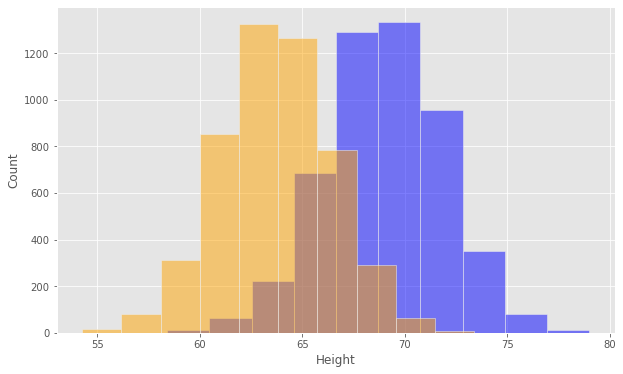

In [58]:
import seaborn as sns
import scipy.stats as gaussian_kde

plt.figure(figsize=(10,6))
sns.histplot(male_df['Height'], bins = 10, alpha = 0.5, color = 'blue', label = 'Male Height')
sns.histplot(female_df['Height'], bins = 10, alpha = 0.5, color = 'orange', label = 'Female Height')

In [59]:
# Record your observations - are these inline with your personal observations?
# Yes, as it is expected that males height average are slightly above females height.

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

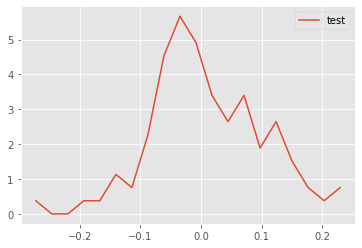

In [60]:
def density(x):
    n, bins = np.histogram(x, 20, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

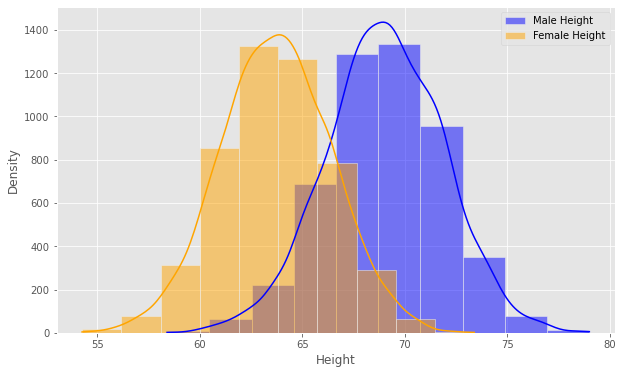

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(male_df['Height'], bins = 10, alpha = 0.5, color = 'blue', label = 'Male Height', kde = True)
sns.histplot(female_df['Height'], bins = 10, alpha = 0.5, color = 'orange', label = 'Female Height', kde = True)

plt.xlabel('Height')
plt.ylabel('Density')
plt.legend()
plt.show()

## Repeat above exerice for male and female weights

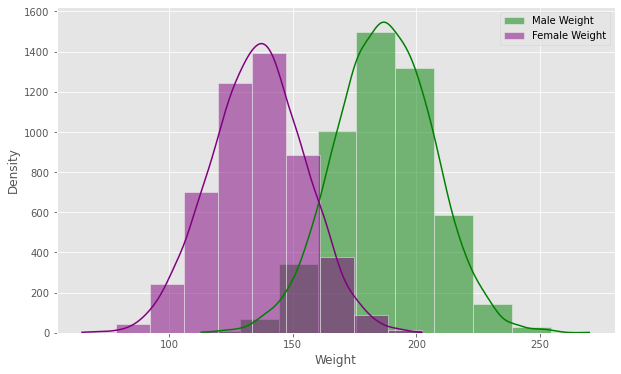

In [62]:
plt.figure(figsize=(10,6))
sns.histplot(male_df['Weight'], bins = 10, alpha = 0.5, color = 'green', label = 'Male Weight', kde = True)
sns.histplot(female_df['Weight'], bins = 10, alpha = 0.5, color = 'purple', label = 'Female Weight', kde = True)

plt.xlabel('Weight')
plt.ylabel('Density')
plt.legend()
plt.show()

## Write your observations in the cell below

In [63]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat Above experiments in seaborn and compare with your results

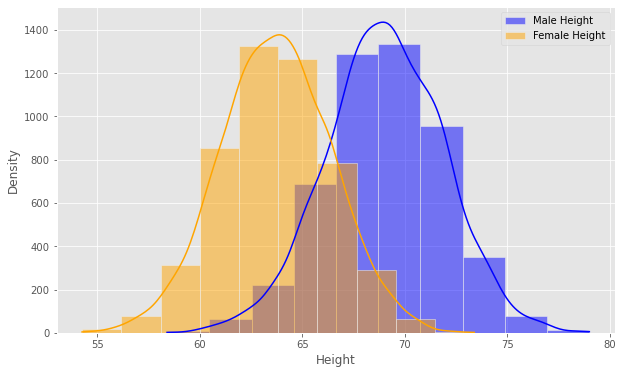

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(male_df['Height'], bins = 10, alpha = 0.5, color = 'blue', label = 'Male Height', kde = True)
sns.histplot(female_df['Height'], bins = 10, alpha = 0.5, color = 'orange', label = 'Female Height', kde = True)

plt.xlabel('Height')
plt.ylabel('Density')
plt.legend()
plt.show()

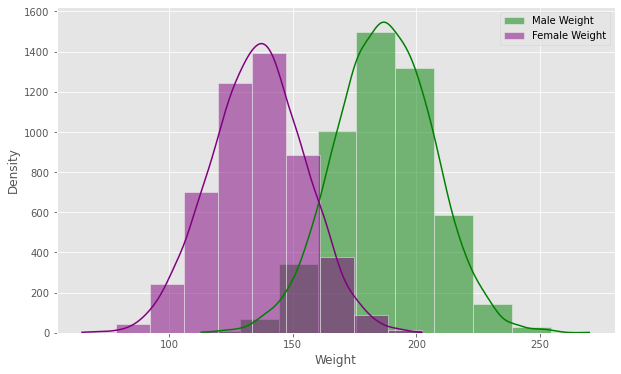

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(male_df['Weight'], bins = 10, alpha = 0.5, color = 'green', label = 'Male Weight', kde = True)
sns.histplot(female_df['Weight'], bins = 10, alpha = 0.5, color = 'purple', label = 'Female Weight', kde = True)

plt.xlabel('Weight')
plt.ylabel('Density')
plt.legend()
plt.show()

In [66]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.